In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("Data.csv")
df

,Medicine_Name,User_ID,Disease,Review_Text,Rating
0,Malaki Churna,User123,Indigestion,This churna works wonders! My digestion has im...,5
1,Malaki Churna,User124,Acid Reflux,Malaki Churna has been a lifesaver for my acid...,5
2,Malaki Churna,User125,Indigestion,I'm disappointed with Malaki Churna. It did no...,2
3,Malaki Churna,User126,Bloating,This churna is amazing! It has helped me regul...,4
4,Malaki Churna,User127,Indigestion,"I tried Malaki Churna for a week, but I didn't...",2
...,...,...,...,...,...
1071,Kaisora Guggulu,User1076,Side Effects,I experienced mild digestive discomfort after ...,3
1072,Kaisora Guggulu,User1077,Tolerance,I've been using Kaisora Guggulu for a while no...,4
1073,Kaisora Guggulu,User1078,Quality of Life,Kaisora Guggulu has improved my overall qualit...,5
1074,Kaisora Guggulu,User1079,Long-term Use,I've been using Kaisora Guggulu for several mo...,4


In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [25]:
sid = SentimentIntensityAnalyzer()

In [26]:
def classify_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Sarcastic'

In [27]:
df['Sentiment'] = df['Review_Text'].apply(classify_sentiment)


In [28]:
df

,Medicine_Name,User_ID,Disease,Review_Text,Rating,Sentiment
0,Malaki Churna,User123,Indigestion,This churna works wonders! My digestion has im...,5,Positive
1,Malaki Churna,User124,Acid Reflux,Malaki Churna has been a lifesaver for my acid...,5,Positive
2,Malaki Churna,User125,Indigestion,I'm disappointed with Malaki Churna. It did no...,2,Negative
3,Malaki Churna,User126,Bloating,This churna is amazing! It has helped me regul...,4,Positive
4,Malaki Churna,User127,Indigestion,"I tried Malaki Churna for a week, but I didn't...",2,Sarcastic
...,...,...,...,...,...,...
1071,Kaisora Guggulu,User1076,Side Effects,I experienced mild digestive discomfort after ...,3,Negative
1072,Kaisora Guggulu,User1077,Tolerance,I've been using Kaisora Guggulu for a while no...,4,Negative
1073,Kaisora Guggulu,User1078,Quality of Life,Kaisora Guggulu has improved my overall qualit...,5,Negative
1074,Kaisora Guggulu,User1079,Long-term Use,I've been using Kaisora Guggulu for several mo...,4,Positive


In [46]:
df.to_csv('<your path to current directory>', index=False)


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_20076\2429142130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diseases.values, y=top_diseases.index, palette='viridis')


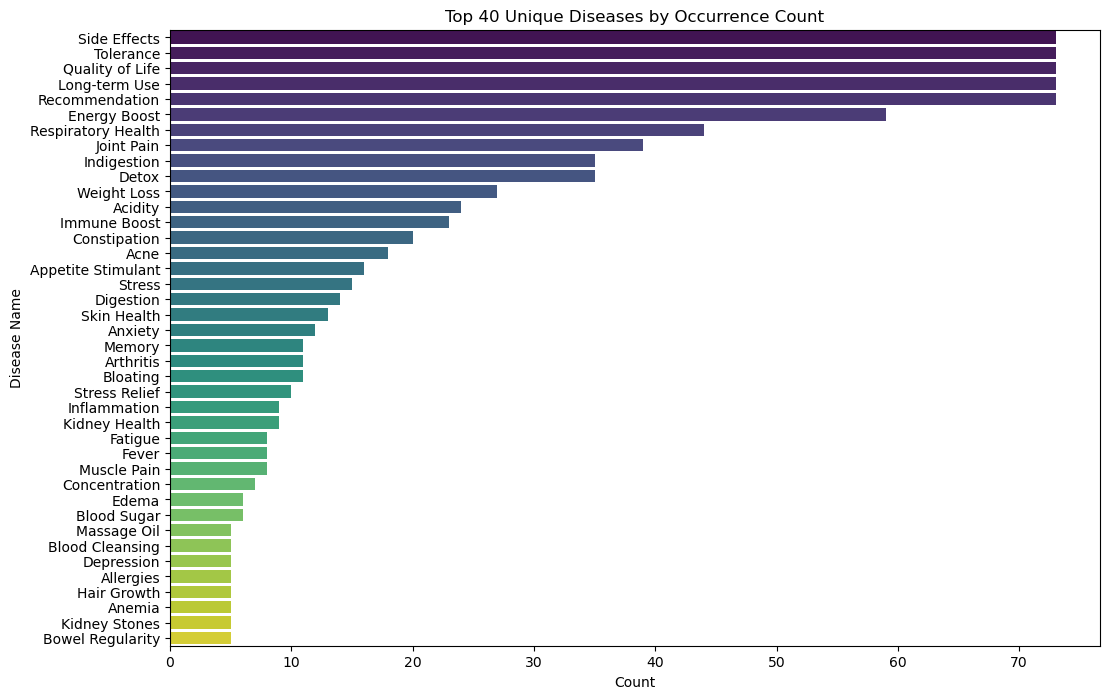

In [35]:
top_diseases = df['Disease'].value_counts().head(40)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_diseases.values, y=top_diseases.index, palette='viridis')
plt.title('Top 40 Unique Diseases by Occurrence Count')
plt.xlabel('Count')
plt.ylabel('Disease Name')
plt.show()

In [37]:
df.Medicine_Name.nunique()

109

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_20076\1724271007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


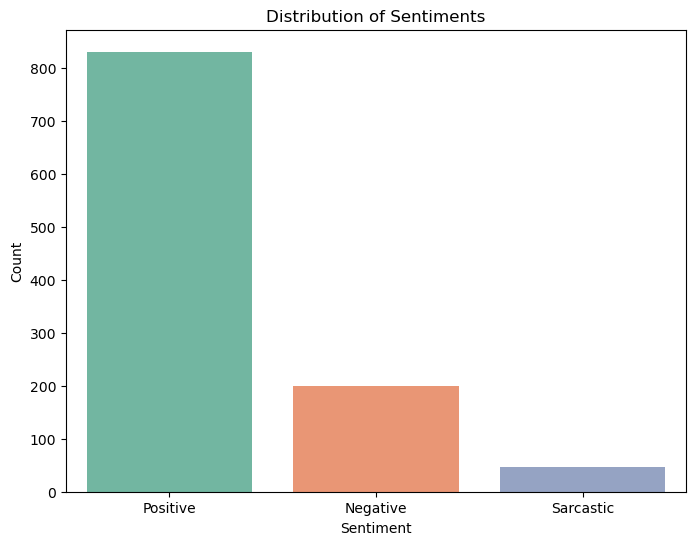

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()